# Eksploratiivista data-analyysia Ropecon 2022 datalla

## Importit

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from read_data import read_data, get_all_usernames
from datetime import datetime, timedelta
import locale

from scipy import stats

locale.setlocale(locale.LC_ALL,'fi_FI')
%matplotlib widget

In [60]:
sns.set_theme('paper')
sns.set(font_scale=1.5)

## Ladataan data

Tässä käytetään omaa [read_data.py](read_data.py) moduulia

In [61]:
signedGames = read_data('users')
userSignups = read_data('signups')
results = read_data('results')
games = read_data('games')
usernames = get_all_usernames()

## Katsotaan miltä data näyttää

In [62]:
signedGames.head()

,priority,time,gameDetails.gameId,username,userGroup,serial,groupCode,createdAt,updatedAt
0,1,2022-07-31T07:00:00Z,p5349,794300,user,6624939010,0,2022-07-29T11:13:42.151Z,2022-07-31T08:00:37.262Z
1,1,2022-07-31T10:00:00Z,p5351,794300,user,6624939010,0,2022-07-29T11:13:42.151Z,2022-07-31T08:00:37.262Z
2,1,2022-07-30T14:00:00Z,p5671,74166,user,1926604032,0,2022-07-29T12:00:34.568Z,2022-07-30T16:00:34.809Z
3,3,2022-07-30T07:00:00Z,p5171,74166,user,1926604032,0,2022-07-29T12:00:34.568Z,2022-07-30T16:00:34.809Z
4,1,2022-07-30T07:00:00Z,p5575,74166,user,1926604032,0,2022-07-29T12:00:34.568Z,2022-07-30T16:00:34.809Z


In [63]:
userSignups.head()

,username,priority,time,message,game.gameId,count,createdAt,updatedAt
0,815795,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
1,129921,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
2,87501,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
3,987073,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
4,375661,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z


In [64]:
results.head()

,username,enteredGame.gameDetails.gameId,enteredGame.priority,enteredGame.time,startTime,algorithm,message,updatedAt,createdAt
0,804595,p5263,3,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
1,451394,p5263,2,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
2,799060,p5414,3,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
3,254323,p5414,1,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
4,99090,p5664,1,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z


In [65]:
games.head()

,gameId,accessibilityValues,contentWarnings,createdAt,description,endTime,gameSystem,genres,language,location,...,people,popularity,programType,revolvingDoor,shortDescription,startTime,styles,tags,title,updatedAt
0,p5081,[remainingOnePlace],,2022-07-17T19:54:20.195Z,Nyt pääsevät haasteesta kiinnostuneet Commande...,2022-07-29T19:00:00Z,Magic the Gathering (Formaatti: Commander),[],fi,Halli 3 Turnaussali,...,"Arno Laine, Valtteri Hyyppä",0,tournament,False,,2022-07-29T13:00:00Z,[],"[inEnglish, forAdults, tournament]",Magic the Gathering: Commander (cEDH) Double E...,2022-08-02T13:00:04.587Z
1,p5644,[],Vampires,2022-07-17T19:54:20.194Z,"No longer actually a qualifier, but we're keep...",2022-07-29T14:30:00Z,Vampire: The Eternal Struggle (VTES),[],fi,Sali 208,...,,0,tournament,False,,2022-07-29T06:30:00Z,[],"[inEnglish, tournament]",VTES: Last Chance Qualifier (LCQ),2022-08-02T13:00:04.587Z
2,p5659,[],Vampyyrit | Vampires,2022-07-17T19:54:20.195Z,HUOMAA ETTÄ PERJANTAIN ALOITTELIJATURNAUS TURN...,2022-07-29T14:00:00Z,Vampire: The Eternal Struggle (VTES),[],fi,Sali 208,...,,0,tournament,False,,2022-07-29T06:30:00Z,[],"[inEnglish, beginnerFriendly, tournament]",VTES: Perjantain aloittelijaturnaus | VTES: Be...,2022-08-02T13:00:04.586Z
3,p5117,[],"väkivalta, kuolema",2022-07-17T19:54:20.195Z,Pelaajat ovat matkalla jättien maassa yhdessä ...,2022-07-29T17:00:00Z,D&D 5e,[],fi,Lehdistötila,...,Jani Hiltunen,0,tabletopRPG,False,"Taistelupainotteinen seikkailu D&Dllä, jossa y...",2022-07-29T13:00:00Z,"[light, rulesHeavy, characterDriven, combatDri...","[forAdults, beginnerFriendly, themeFriendship]",D&D Scamatania Kääpiö jättien maassa,2022-08-02T13:00:04.587Z
4,p4867,[],,2022-07-17T19:54:20.195Z,Viisi Koboldia Trenssitakissa on hassuttelupel...,2022-07-29T17:00:00Z,D&D 5E,[],fi,Mesta,...,"Sisko ""sieppeli"" Turunen",0,tabletopRPG,False,D&D 5E kaupunkipeli yhdellä hahmoluokalla/D&D ...,2022-07-29T13:00:00Z,"[light, rulesLight, characterDriven]","[beginnerFriendly, themeFriendship]",Viisi Koboldia Trenssitakissa/Five Kobolds in ...,2022-08-02T13:00:04.587Z


## Luodaan uudet dataframet, jotka sisältävät ainoastaan pöytäropet

pyötäropejen id:t löytyvät games-dataframesta programType-sarakkeesta

In [66]:
ttrpg = games[games.programType=='tabletopRPG'].gameId.to_list()
signups_ttrpg = userSignups[userSignups['game.gameId'].isin(ttrpg)]
signedGames_ttrpg = signedGames[signedGames['gameDetails.gameId'].isin(ttrpg)]
games_ttrpg = games[games.programType == 'tabletopRPG']

### Lisätään kaikkiin uusiin pöytärope-dataframeihin datetime-sarake, joka sisältää ajan, jolloin peli alkoi

Konsti tallentaa alkamisajan vyöhykkeellä GMT, joten lisätään kaksi tuntia Konstin alkamisaikaan

In [67]:
signups_ttrpg = signups_ttrpg.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in signups_ttrpg.time])

In [68]:
signedGames_ttrpg = signedGames_ttrpg.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in signedGames_ttrpg.time])

In [69]:
results = results.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in results.startTime])

In [70]:
games_ttrpg = games_ttrpg.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in games_ttrpg.startTime])

## Kuinka moni rekistöröityy Konstiin, mutta ei koittanut päästä yhteenkään yhteenkään peliin missään muodossa (pöytärope, larp, turnaukset)

In [71]:
# users_with_no_games_all = []
# for user in usernames:
#     num_signups = userSignups[userSignups.username==user].shape[0]
#     num_signedGames = signedGames[signedGames.username==user].shape[0]
#     if num_signups == 0 and num_signedGames == 0:
#         users_with_no_games_all.append(user)

In [72]:
#print(f'{len(users_with_no_games_all)} ({np.round(len(users_with_no_games_all)/len(usernames)*100,1)}%) ei yrittänyt osallistua yhteenkään peliin missään formaatissa')

## Kuinka monta pelaajaa ei päässyt yhteenkään peliin

In [73]:
# Etistään ne pelaajat, jotka eivät ole olleet yhdessäkään ropessa, mutta ovat yrittäneet päästä vähintään yhteen peliin
users_with_signups = signups_ttrpg.username.unique()
users_atleast_one_signedGame = signedGames_ttrpg.username.unique()
#users_no_games_and_atleast_one_signedGame = set(users_with_no_games).intersection(set(users_atleast_one_signedGame))
users_no_games_atleast_one_signedGame = set(users_atleast_one_signedGame).difference(set(users_with_signups))

In [74]:
print(f"{np.round(len(users_no_games_atleast_one_signedGame)/len(usernames)*100,1)}% ({len(users_no_games_atleast_one_signedGame)}) yritti päästä pöytäropeen, mutta ei päässyt")

12.4% (134) yritti päästä pöytäropeen, mutta ei päässyt


## Kuinka moni pelaaja ei käyttänyt arvontaa, mutta pääsi peliin

In [75]:
users_with_no_signedGames_and_atleast_one_signup = set(users_with_signups).difference(set(users_atleast_one_signedGame))
print(f"{np.round(len(users_with_no_signedGames_and_atleast_one_signup)/len(usernames)*100,1)}% ({len(users_with_no_signedGames_and_atleast_one_signup)}) pääsi peliin käyttämättä arvontaa")

12.3% (133) pääsi peliin käyttämättä arvontaa


## Kuinka moneen peliin ne käyttäjät, jotka eivät päässeet yhteenkään peliin, yrittivät päästä arvonnassa

In [76]:
num_signedGames = signedGames_ttrpg.query('username in @users_no_games_atleast_one_signedGame').groupby(by='username').count().loc[:, 'gameDetails.gameId']

In [77]:
print(f"Keskimäärin käyttäjät jotka eivät päässeet yhteenkään peliin yrittivät päästä {np.round(num_signedGames.mean(),1)} peliin arvontavaiheessa")

Keskimäärin käyttäjät jotka eivät päässeet yhteenkään peliin yrittivät päästä 2.4 peliin arvontavaiheessa


### Ketkä olivat "epäonnisimmat pelaajat" (yrittivät päästä suurimpaan määrään pelejä arvonnassa, mutta eivät päässet sinne)

In [78]:
print(f"{len(num_signedGames[num_signedGames==num_signedGames.max()])} käyttäjää yrittivät päästä {int(num_signedGames.max())} pöytäropeen arvontavaiheessa, mutta eivät päässeet pelaamaan kertaakaan")

4 käyttäjää yrittivät päästä 11 pöytäropeen arvontavaiheessa, mutta eivät päässeet pelaamaan kertaakaan


### Mikä oli täyttöaste peleissa johon pelaajat, joilla oli 11 osallistusmista mutta eivät päässeet kertaakaan pelaamaan, osallistuivat

In [79]:
users_no_games_and_signedGames = list(users_no_games_atleast_one_signedGame)

In [80]:
signedGames_slots = signedGames_ttrpg.groupby(by=["username","datetime"]).count()

In [81]:
unlucky_users = num_signedGames[num_signedGames==num_signedGames.max()].index

In [82]:
signedGames_slots[signedGames_slots.index.get_level_values(0).isin(unlucky_users)]

priority  time  gameDetails.gameId  userGroup  \
username datetime                                                             
113764   2022-07-29 19:00:00         3     3                   3          3   
         2022-07-29 20:00:00         2     2                   2          2   
         2022-07-29 21:00:00         3     3                   3          3   
         2022-07-30 14:00:00         1     1                   1          1   
         2022-07-30 16:00:00         1     1                   1          1   
         2022-07-30 17:00:00         1     1                   1          1   
357742   2022-07-30 13:00:00         2     2                   2          2   
         2022-07-30 14:00:00         3     3                   3          3   
         2022-07-31 11:00:00         3     3                   3          3   
         2022-07-31 12:00:00         3     3                   3          3   
743739   2022-07-30 12:00:00         2     2                   2          2   
         2022-07-30 15:00:00         1     1                   1          1   
         2022-07-30 16:00:00         1     1                   1          1   
         2022-07-30 17:00:00         3     3                   3          3   
         2022-07-30 18:00:00         1     1                   1          1   
         2022-07-30 19:00:00         2     2                   2          2   
         2022-07-30 20:00:00         1     1                   1          1   
750984   2022-07-30 17:00:00         3     3                   3          3   
         2022-07-30 19:00:00         2     2                   2          2   
         2022-07-30 20:00:00         3     3                   3          3   
         2022-07-31 12:00:00         3     3                   3          3   

                              serial  groupCode  createdAt  updatedAt  
username datetime                                                      
113764   2022-07-29 19:00:00       3          3          3          3  
         2022-07-29 20:00:00       2          2          2          2  
         2022-07-29 21:00:00       3          3          3          3  
         2022-07-30 14:00:00       1          1          1          1  
         2022-07-30 16:00:00       1          1          1          1  
         2022-07-30 17:00:00       1          1          1          1  
357742   2022-07-30 13:00:00       2          2          2          2  
         2022-07-30 14:00:00       3          3          3          3  
         2022-07-31 11:00:00       3          3          3          3  
         2022-07-31 12:00:00       3          3          3          3  
743739   2022-07-30 12:00:00       2          2          2          2  
         2022-07-30 15:00:00       1          1          1          1  
         2022-07-30 16:00:00       1          1          1          1  
         2022-07-30 17:00:00       3          3          3          3  
         2022-07-30 18:00:00       1          1          1          1  
         2022-07-30 19:00:00       2          2          2          2  
         2022-07-30 20:00:00       1          1          1          1  
750984   2022-07-30 17:00:00       3          3          3          3  
         2022-07-30 19:00:00       2          2          2          2  
         2022-07-30 20:00:00       3          3          3          3  
         2022-07-31 12:00:00       3          3          3          3

In [83]:
signedGames_games = signedGames_ttrpg.groupby(by=['username','gameDetails.gameId']).count()

In [84]:
games_unlucky_users = signedGames_games[signedGames_games.index.get_level_values(0).isin(unlucky_users)]

In [85]:
games_unlucky_users_tried_to_sign = list(games_unlucky_users.index.get_level_values(1).unique())

In [86]:
signedGames_gameCounts = signedGames_ttrpg.groupby(by=['gameDetails.gameId']).count()

In [87]:
maxAttendances =  games[games.gameId.isin(list(signedGames_gameCounts.index))].loc[:, ['gameId','maxAttendance']].sort_values(by='gameId')

In [88]:
signedGames_gameCounts = signedGames_gameCounts.assign(maxAttendance = maxAttendances.loc[:, 'maxAttendance'].to_numpy())

In [89]:
signedGames_gameCounts = signedGames_gameCounts.assign(fillPercent = lambda x: x['username']/x['maxAttendance'])

In [90]:
(signedGames_gameCounts.loc[:, 'fillPercent'].median(), signedGames_gameCounts.loc[:, 'fillPercent'].std())

(2.4642857142857144, 2.3305381209590625)

In [91]:
signedGames_gameCounts_unlucky_users = signedGames_gameCounts[signedGames_gameCounts.index.get_level_values(0).isin(games_unlucky_users_tried_to_sign)]

In [92]:
fillPercents = signedGames_gameCounts.loc[:, 'fillPercent'].to_numpy()

(array([0.16352201, 0.12578616, 0.20125786, 0.26415094, 0.25157233,
        0.1509434 , 0.16352201, 0.13836478, 0.08805031, 0.0754717 ,
        0.03773585, 0.11320755, 0.03773585, 0.01257862, 0.01257862,
        0.06289308, 0.02515723, 0.03773585, 0.01257862, 0.02515723]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 20 artists>)

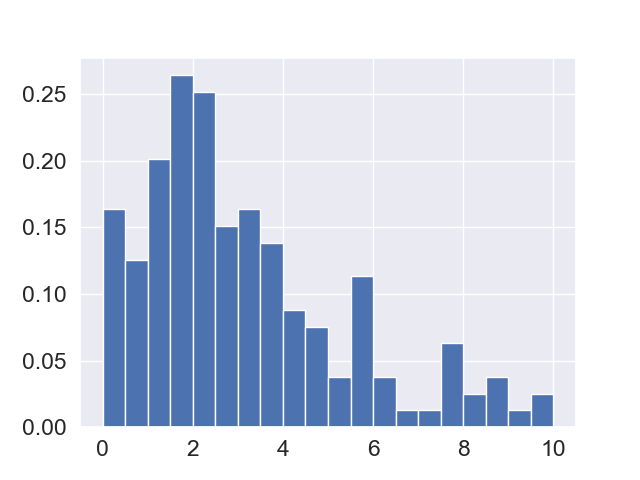

In [93]:
fig, ax = plt.subplots()

ax.hist(fillPercents, bins=np.linspace(0,10,21), density=True)

In [94]:
(signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].mean(),signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].std())

(5.015972222222222, 2.7551685736171607)

In [95]:
(signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].min(), signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].max())

(1.4, 10.4)

In [96]:
fillPercents_unlucky_users = signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].to_numpy()

(array([0., 0., 1., 2., 4., 3., 5., 3., 2., 1., 1., 2., 1., 0., 0., 3., 2.,
        2., 1., 2.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 20 artists>)

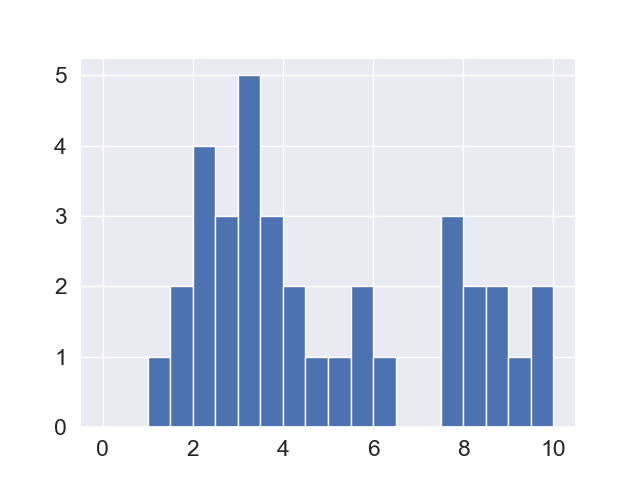

In [97]:
fig, ax = plt.subplots()

ax.hist(fillPercents_unlucky_users, bins=np.linspace(0,10,21))

### Mikä täyttöaste on peleissa johon pelaajat, joilla oli 5 yritystä mutta eivät päässeet kertaakaan pelaamaan, osallistuivat

In [98]:
signedGames_slots = signedGames_ttrpg.groupby(by=["username","datetime"]).count()

In [99]:
unlucky_users = num_signedGames[num_signedGames>=5].index

In [100]:
games_unlucky_users = signedGames_games[signedGames_games.index.get_level_values(0).isin(unlucky_users)]

In [101]:
games_unlucky_users_tried_to_sign = list(games_unlucky_users.index.get_level_values(1).unique())

### Täyttöaste kaikissa peleissä

In [102]:
(signedGames_gameCounts.loc[:, 'fillPercent'].median(), signedGames_gameCounts.loc[:, 'fillPercent'].std())

(2.4642857142857144, 2.3305381209590625)

In [103]:
signedGames_gameCounts_unlucky_users = signedGames_gameCounts[signedGames_gameCounts.index.get_level_values(0).isin(games_unlucky_users_tried_to_sign)]

### Täyttöaste peleissä johon epäonniset yrittivät päästä

In [104]:
(signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].median(),signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].std())

(3.8, 2.472275071760567)

In [105]:
(signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].min(), signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].max())

(1.25, 10.4)

In [106]:
fillPercents_unlucky_users = signedGames_gameCounts_unlucky_users.loc[:, 'fillPercent'].to_numpy()

In [107]:
shape, loc, scale = stats.lognorm.fit(fillPercents_unlucky_users)

## Kolmogorov-Smirnov testi jakaumien samankaltaisuuksille

In [109]:
stats.ks_2samp(fillPercents, fillPercents_unlucky_users, alternative='two-sided')

KstestResult(statistic=0.3, pvalue=0.0003499253272959761)

## Kuinka moneen arvontaan pelaajat jotka eivät päässeet pelaamaan yhtään pöytäropea, yrittivät päästä

In [110]:
targets = np.linspace(1,15,15)
for target in targets:
    num_players = len(num_signedGames[num_signedGames==target])
    num_all = num_signedGames.shape[0]
    print(f"{num_players} ({np.round(num_players/num_all*100,1)}%) käyttäjää yritti päästä {target} pöytäropeen, mutta ei päässyt pelaamaan")

64 (47.8%) käyttäjää yritti päästä 1.0 pöytäropeen, mutta ei päässyt pelaamaan
33 (24.6%) käyttäjää yritti päästä 2.0 pöytäropeen, mutta ei päässyt pelaamaan
15 (11.2%) käyttäjää yritti päästä 3.0 pöytäropeen, mutta ei päässyt pelaamaan
8 (6.0%) käyttäjää yritti päästä 4.0 pöytäropeen, mutta ei päässyt pelaamaan
3 (2.2%) käyttäjää yritti päästä 5.0 pöytäropeen, mutta ei päässyt pelaamaan
2 (1.5%) käyttäjää yritti päästä 6.0 pöytäropeen, mutta ei päässyt pelaamaan
2 (1.5%) käyttäjää yritti päästä 7.0 pöytäropeen, mutta ei päässyt pelaamaan
3 (2.2%) käyttäjää yritti päästä 8.0 pöytäropeen, mutta ei päässyt pelaamaan
0 (0.0%) käyttäjää yritti päästä 9.0 pöytäropeen, mutta ei päässyt pelaamaan
0 (0.0%) käyttäjää yritti päästä 10.0 pöytäropeen, mutta ei päässyt pelaamaan
4 (3.0%) käyttäjää yritti päästä 11.0 pöytäropeen, mutta ei päässyt pelaamaan
0 (0.0%) käyttäjää yritti päästä 12.0 pöytäropeen, mutta ei päässyt pelaamaan
0 (0.0%) käyttäjää yritti päästä 13.0 pöytäropeen, mutta ei päässyt

## Kuinka monessa alkamisajassa kaikki pelaajat yrittivät päästä pelaamaan ja kuinka monessa alkmaisajassa epäonniset (>=5 yritystä mutta ei pelejä) yrittivät päästä pelaamaan

In [111]:
slots_all = signedGames_slots.loc[:, 'gameDetails.gameId'].droplevel(1,  axis=0).groupby(level=0).sum()

In [112]:
slots_unlucky = signedGames_slots[signedGames_slots.index.get_level_values(0).isin(unlucky_users)].loc[:, 'gameDetails.gameId'].droplevel(1, axis=0).groupby(level=0).sum()

In [170]:
slots_unlucky

username
10387      5
113764    11
182523     8
232147     5
29298      6
297481     8
357742    11
743739    11
750984    11
792116     7
797777     5
826844     8
827044     7
864803     6
Name: gameDetails.gameId, dtype: int64

In [113]:
users_got_to_play = signups_ttrpg.username.unique()

In [114]:
slots_got_to_play = signedGames_slots[signedGames_slots.index.get_level_values(0).isin(users_got_to_play)].loc[:, 'gameDetails.gameId'].droplevel(1, axis=0).groupby(level=0).sum()

In [115]:
slots_got_to_play

username
100671    2
104737    3
107034    5
10936     2
110613    1
         ..
99473     2
996273    1
998133    6
998990    2
999471    2
Name: gameDetails.gameId, Length: 443, dtype: int64

In [174]:
print(f'Epäonniset pelaajat yrittivät päästä pelaamaan {slots_unlucky.mean()} +/- {slots_unlucky.std()} aikaslotissa')
print(f'Pelaajat, jotka pääsivät pelaamaan yrittivät päästä pelaamaan {slots_got_to_play.mean()} +/- {slots_got_to_play.std()} aikaslotissa')

Epäonniset pelaajat yrittivät päästä pelaamaan 7.785714285714286 +/- 2.3592231912080863 aikaslotissa
Pelaajat, jotka pääsivät pelaamaan yrittivät päästä pelaamaan 4.693002257336343 +/- 4.366741930055554 aikaslotissa


## Kuinka moneen peliin käyttäjät yrittivät päästä arvontavaiheessa

In [117]:
num_signedGames_all = np.zeros(len(users_atleast_one_signedGame,))
for i, user in enumerate(users_atleast_one_signedGame):
    num_signedGames_all[i] = signedGames_ttrpg[signedGames_ttrpg['username'] == user].shape[0]

Text(0.5, 1.0, 'Kuinka moneen arvontaan käyttäjät osallistuivat')

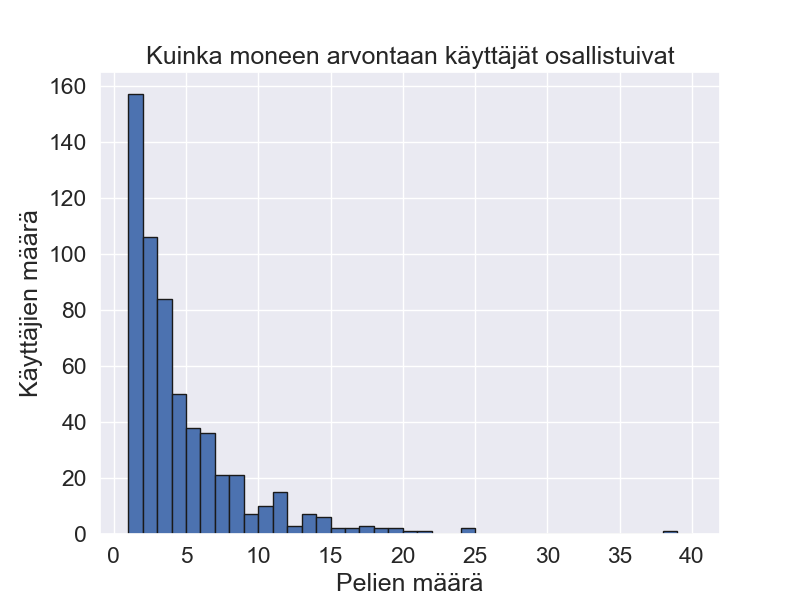

In [118]:
fig, ax = plt.subplots(figsize=(8,6))
counts, bins, bars = ax.hist(num_signedGames_all, bins=np.linspace(1,40,40), linewidth=1, edgecolor='k')
ax.set_xlabel('Pelien määrä')
ax.set_ylabel('Käyttäjien määrä')
ax.set_title('Kuinka moneen arvontaan käyttäjät osallistuivat')

In [119]:
print(f'Keskimäärin käyttäjät yrittivät päästä {np.round(np.mean(num_signedGames_all),1)} peliin')

Keskimäärin käyttäjät yrittivät päästä 4.2 peliin


In [120]:
print(f'Pelimäärän mediaani on {np.round(np.median(num_signedGames_all),1)} peliä')

Pelimäärän mediaani on 3.0 peliä


## Mikä on todennäköisyys päästä ainakin yhteen peliin arvontavaiheessa valittujen pelien funktiona

In [121]:
signedGames_total = np.linspace(1,20,20)
chance_no_game = np.zeros((signedGames_total.shape))
for i,n in enumerate(signedGames_total):
    chance_no_game[i] = len(num_signedGames[num_signedGames==n])/len(num_signedGames_all[num_signedGames_all==n])

chance_no_game

array([0.40764331, 0.31132075, 0.17857143, 0.16      , 0.07894737,
       0.05555556, 0.0952381 , 0.14285714, 0.        , 0.        ,
       0.26666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

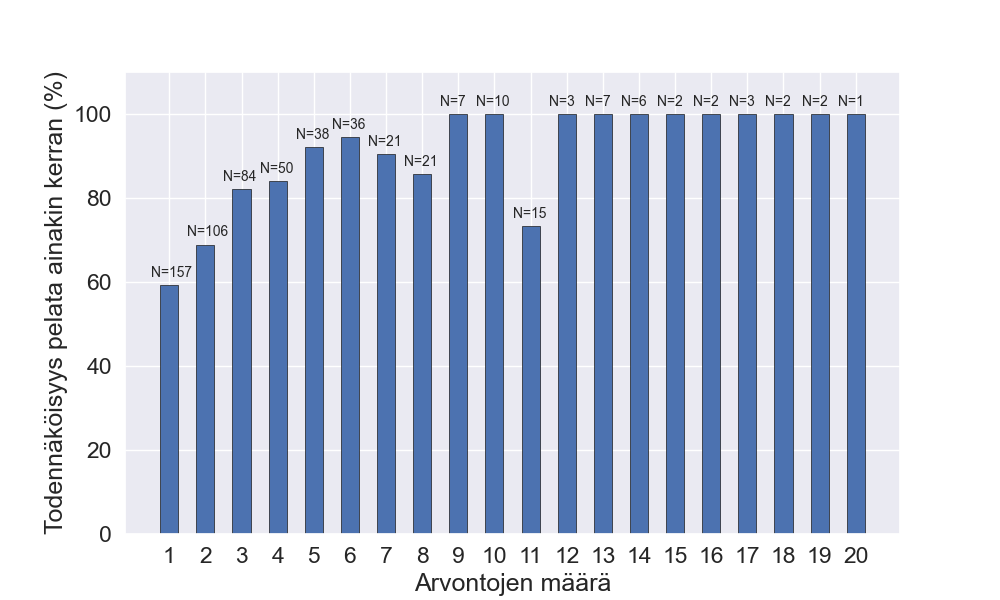

In [122]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(signedGames_total, (1-chance_no_game)*100, width=0.5, linewidth=0.5, edgecolor='k')
ax.set_xlabel('Arvontojen määrä')
ax.set_ylabel('Todennäköisyys pelata ainakin kerran (%)')
ax.set_xticks(np.linspace(1,20,20))
ax.set_ylim([0, 110])
for i,n in enumerate(signedGames_total):
    ax.text(n-0.5, (1-chance_no_game[i])*100 + 2, f'N={len(num_signedGames_all[num_signedGames_all==n])}', fontsize=10)

## Kuinka monta peliä käyttäjät pelasivat

In [123]:
signups_ttrpg.head()

,username,priority,time,message,game.gameId,count,createdAt,updatedAt,datetime
0,815795,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00
1,129921,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00
2,87501,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00
3,987073,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00
4,375661,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00


In [124]:
users_signup_ttrpg = signups_ttrpg.username.unique()

In [125]:
num_enteredGames = signups_ttrpg.groupby(by='username').count().loc[:, 'game.gameId']

Text(0.5, 1.0, 'Kuinka monta pöytäroolipeliä käyttäjät pelasivat')

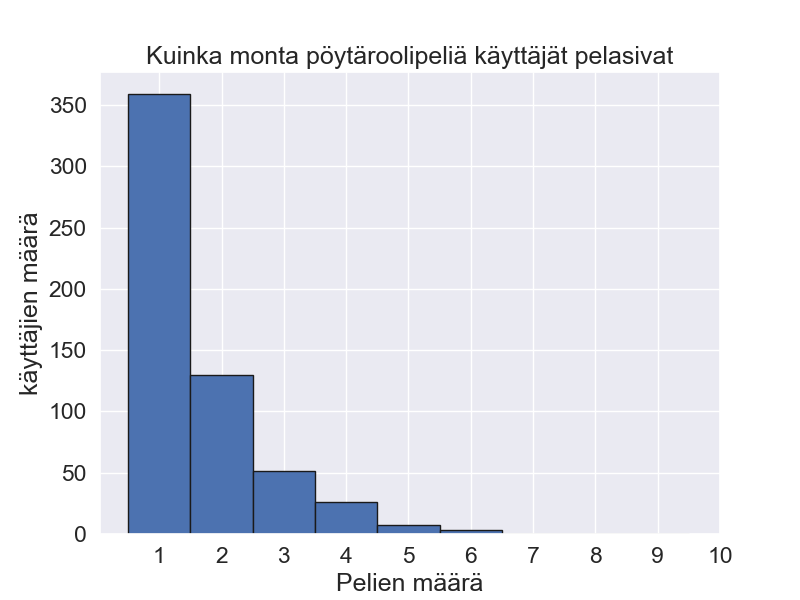

In [126]:
fig, ax = plt.subplots(figsize=(8,6))

counts, bins, bars = ax.hist(num_enteredGames, bins = np.linspace(1,10,10), linewidth=1, edgecolor='k')
ax.set_xticks(np.linspace(1,10,10)+0.5)
ax.set_xticklabels(np.linspace(1,10,10, dtype=int))
ax.set_xlabel('Pelien määrä')
ax.set_ylabel('käyttäjien määrä')
ax.set_title('Kuinka monta pöytäroolipeliä käyttäjät pelasivat')

In [127]:
num_enteredGames[num_enteredGames==1].shape[0]/num_enteredGames.shape[0]

0.6232638888888888

In [128]:
print(f'Kesikimäärin käyttäjät pelasivat {np.round(np.mean(num_enteredGames),1)} peliä')
print(f'Pelattujen pelien mediaani {np.round(np.median(num_enteredGames),1)} peliä per käyttäjä')
max_games = int(np.max(num_enteredGames))
print(f'Suurimmillaan {int(counts[bins[:-1] == max_games][0])} käyttäjää pelasi {max_games} peliä')

Kesikimäärin käyttäjät pelasivat 1.6 peliä
Pelattujen pelien mediaani 1.0 peliä per käyttäjä
Suurimmillaan 3 käyttäjää pelasi 6 peliä


### Katsotaan kuinka moneen arvontaan nämä kolme käyttäjää, jotka pelasivat kuusi peliä osallistuivat

In [129]:
ind_max = np.where(np.array(num_enteredGames)==6)
users_signup_ttrpg[ind_max]

array(['886926', '708181', '280564'], dtype=object)

In [130]:
num_signedGames_all = signedGames_ttrpg.groupby(by='username').count().loc[:, 'gameDetails.gameId']

In [131]:
lucky_users = num_enteredGames[num_enteredGames == num_enteredGames.max()].index.to_list()

In [132]:
[i[1] for i in num_signedGames_all.iteritems() if i[0] in lucky_users]

[14, 13, 20]

### Katsotaan mikä on täyttöprosentti pelaajilla, jotka pelasivat 2 peliä tai enemmän

In [133]:
def mean_signedGames_lucky_users(num_signups):
    lucky_users = num_enteredGames[num_enteredGames >= num_signups].index.to_list()
    num_signedGames_lucky_users = np.array([i[1] for i in num_signedGames_all.iteritems() if i[0] in lucky_users])

    return (num_signedGames_lucky_users.mean(), num_signedGames_lucky_users.std())

In [134]:
num_signups = np.linspace(1,6,6, dtype=np.int32)

for s in num_signups:
    m,std = mean_signedGames_lucky_users(s)
    print(f'Keskimäärin pelaajat jotka pääsivät {s} peliin ilmoittautuivat {np.round(m,1)} +/- {np.round(std,1)} arvontaan')

Keskimäärin pelaajat jotka pääsivät 1 peliin ilmoittautuivat 4.7 +/- 4.4 arvontaan
Keskimäärin pelaajat jotka pääsivät 2 peliin ilmoittautuivat 6.8 +/- 5.2 arvontaan
Keskimäärin pelaajat jotka pääsivät 3 peliin ilmoittautuivat 8.8 +/- 4.9 arvontaan
Keskimäärin pelaajat jotka pääsivät 4 peliin ilmoittautuivat 10.4 +/- 5.4 arvontaan
Keskimäärin pelaajat jotka pääsivät 5 peliin ilmoittautuivat 12.7 +/- 5.9 arvontaan
Keskimäärin pelaajat jotka pääsivät 6 peliin ilmoittautuivat 15.7 +/- 3.1 arvontaan


In [135]:
signups_games = signups_ttrpg.groupby(by=['username', 'game.gameId']).count()

In [136]:
games_lucky_users = signups_games[signups_games.index.get_level_values(0).isin(lucky_users)]

In [137]:
games_lucky_users_signed_and_entered = list(games_lucky_users.index.get_level_values(1).unique())

In [138]:
signedGames_gameCounts_lucky_users = signedGames_gameCounts[signedGames_gameCounts.index.get_level_values(0).isin(games_lucky_users_signed_and_entered)]

In [139]:
signedGames_gameCounts_lucky_users.loc[:, 'fillPercent'].median()

2.9000000000000004

In [140]:
fillPercents_lucky_users = signedGames_gameCounts_lucky_users.loc[:, 'fillPercent'].to_numpy()

In [141]:
stats.ks_2samp(fillPercents, fillPercents_lucky_users, alternative='two-sided')

KstestResult(statistic=0.17708333333333334, pvalue=0.8162020890281165)

In [142]:
fillPercents_lucky_users.shape

(12,)

In [143]:
fillPercents.shape

(160,)

## Kuinka moneen arvontaan osallistuttiin jokaisessa alkamisajassa

In [144]:
start_times = signedGames_ttrpg.datetime

In [145]:
num_signedGames_in_slot = signedGames_ttrpg.groupby(by='datetime').username.count()

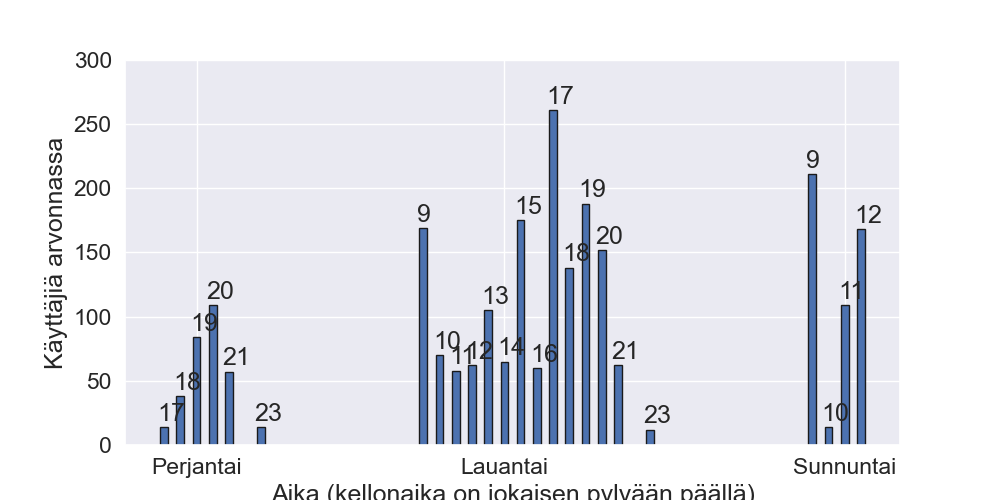

In [146]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(num_signedGames_in_slot.index, num_signedGames_in_slot, width=0.02, edgecolor='k', linewidth=1)

ax.set_ylabel('Käyttäjiä arvonnassa')
ax.set_xlabel('Aika (kellonaika on jokaisen pylvään päällä)')
ax.set_xticks([datetime(2022, 7, 29, 19, 0, 0), datetime(2022, 7, 30, 14, 0, 0), datetime(2022, 7, 31, 11, 0, 0)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'))
ax.set_ylim([0, 300])

for i, n in enumerate(num_signedGames_in_slot):
    ax.text(num_signedGames_in_slot.index[i]-timedelta(minutes=25), n+5, str(num_signedGames_in_slot.index[i].hour))


## Kuinka monta pelaaja kussakin aloitusajassa

In [147]:
num_players_in_slot = signups_ttrpg.groupby(by='datetime').count().username

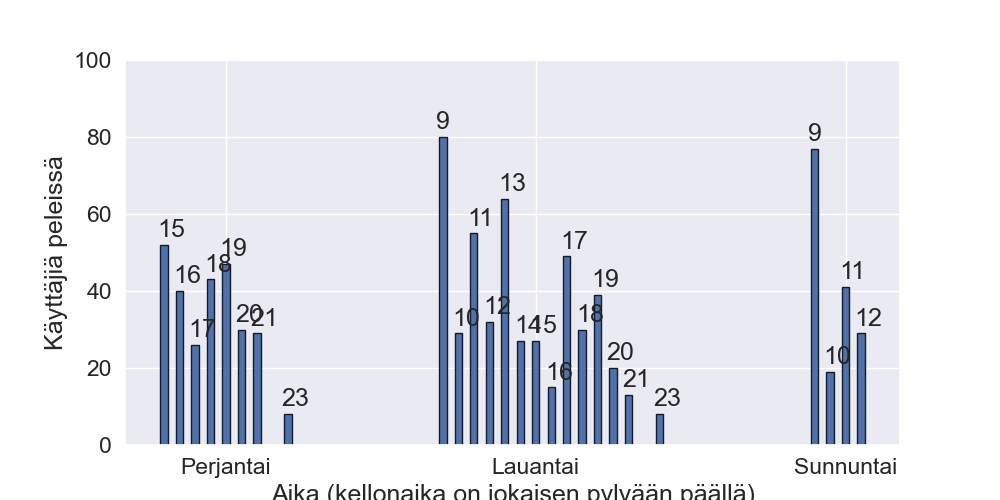

In [148]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(num_players_in_slot.index, num_players_in_slot, width=0.02, edgecolor='k', linewidth=1)

ax.set_ylabel('Käyttäjiä peleissä')
ax.set_xlabel('Aika (kellonaika on jokaisen pylvään päällä)')
ax.set_xticks([datetime(2022, 7, 29, 19, 0, 0), datetime(2022, 7, 30, 15, 0, 0), datetime(2022, 7, 31, 11, 0, 0)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'))
ax.set_ylim([0, 100])

for i, n in enumerate(num_players_in_slot):
    ax.text(num_players_in_slot.index[i]-timedelta(minutes=25), n+2, str(num_players_in_slot.index[i].hour))


## Kuinka täynnä jokainen aloitusaika oli

In [149]:
maxPlayers = games_ttrpg.groupby(by='datetime').sum().maxAttendance

In [150]:
maxPlayers.sum()

1043

In [151]:
xvalues = num_players_in_slot.index
increment = [i*6 for i in range(xvalues.shape[0])]
xvalues = [i + timedelta(hours=j) for i,j in zip(xvalues,increment)]

In [152]:
time_ticks = pd.date_range(xvalues[0], xvalues[-1], freq='12H')

In [153]:
num_players_in_draw = signedGames_ttrpg.groupby(by='datetime').username.unique().apply(lambda x: len(x))

Text(2022-08-05 21:00:00, 220, 'sunnuntai')

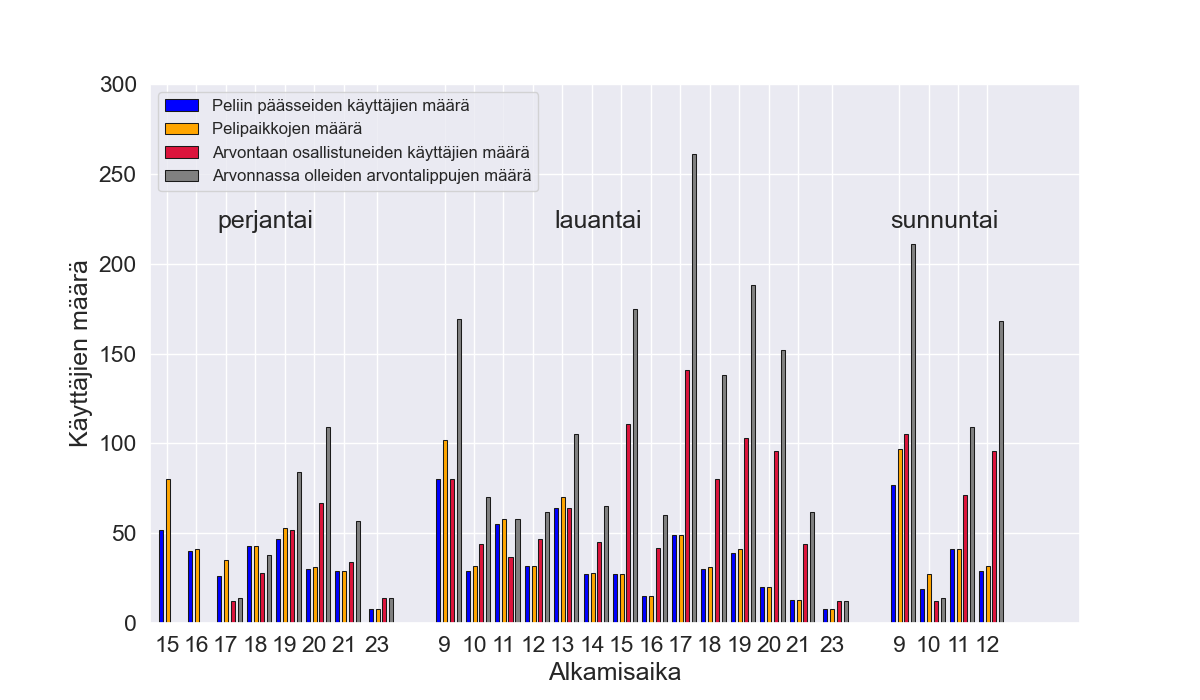

In [154]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar([i+timedelta(minutes=30) for i in xvalues], num_players_in_slot, width=0.04, edgecolor='k', linewidth=0.75, color='blue', label='Peliin päässeiden käyttäjien määrä')
ax.bar([i+timedelta(minutes=2*50+30) for i in xvalues], maxPlayers, width=0.04, edgecolor='k', linewidth=0.75, color='orange', label='Pelipaikkojen määrä')
ax.bar([i+timedelta(minutes=4*50+20) for i in xvalues[2:]], num_players_in_draw, width=0.04, edgecolor='k', linewidth=0.75, color='crimson', label='Arvontaan osallistuneiden käyttäjien määrä')
ax.bar([i+timedelta(minutes=6*50+20) for i in xvalues[2:]], num_signedGames_in_slot, width=0.04, edgecolor='k', linewidth=0.75, color='gray', label='Arvonnassa olleiden arvontalippujen määrä')


ax.set_ylabel('Käyttäjien määrä')
ax.set_xlabel('Alkamisaika')
ax.set_xticks([i+timedelta(minutes=120) for i in xvalues])
ax.set_xticklabels([i.hour for i in num_players_in_slot.index])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_ylim([0, 300])
ax.set_xlim([datetime(2022,7,29,13,0,0), datetime(2022,8,7,18)])
ax.legend(loc='upper left', fontsize=12)
ax.text(xvalues[2], 220, 'perjantai')
ax.text(xvalues[int(len(xvalues)/2)-1], 220, 'lauantai')
ax.text(xvalues[-4], 220, 'sunnuntai')

## Kuinka monta pelaajaa / maksimi kussakin aloitusajassa

In [155]:
games_in_slot_sum = games_ttrpg.groupby(by='datetime').sum()

Text(2022-07-31 09:00:00, 101, 'sunnuntai')

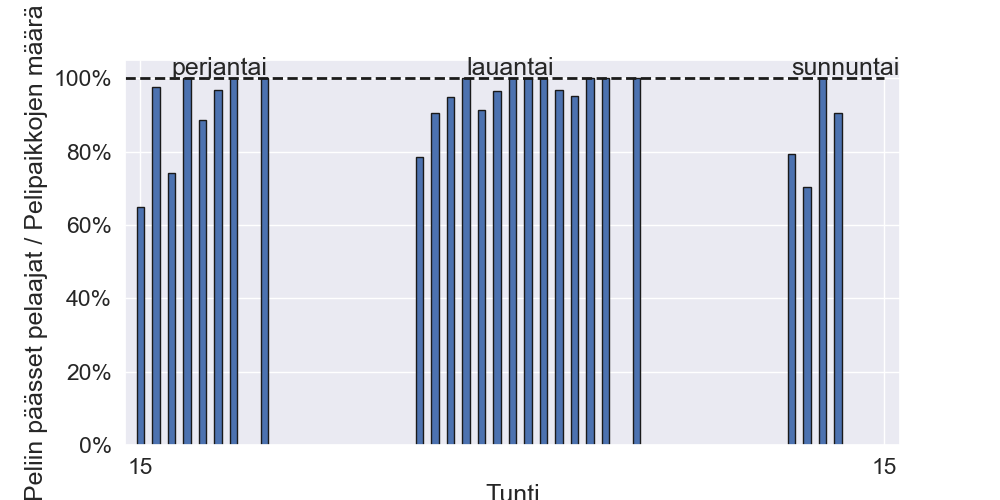

In [156]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(num_players_in_slot.index, num_players_in_slot/games_in_slot_sum['maxAttendance']*100, width=0.02, edgecolor='k', linewidth=1)

ax.plot((datetime(2022,7,29,14), datetime(2022,7,31,15)), (100, 100), color='k', linestyle='--', linewidth=2)
ax.set_ylabel('Peliin päässet pelaajat / Pelipaikkojen määrä')
ax.set_xlabel('Tunti')
ax.set_xticks(time_ticks[time_ticks.hour >= 9][::2])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_ylim([0, 105])
ax.set_xlim([datetime(2022,7,29,14,0,0), datetime(2022,7,31,16)])
ax.set_yticks(np.linspace(0,100,6))
ax.set_yticklabels([f'{int(n)}%' for n in ax.get_yticks()])
ax.text(datetime(2022,7,29,17,00), 101, 'perjantai')
ax.text(datetime(2022,7,30,12,00), 101, 'lauantai')
ax.text(datetime(2022,7,31,9,00), 101, 'sunnuntai')

## Kuinka monta pelia alkoi

In [157]:
signups_ttrpg.columns

Index(['username', 'priority', 'time', 'message', 'game.gameId', 'count',
       'createdAt', 'updatedAt', 'datetime'],
      dtype='object')

In [158]:
players_in_game = signups_ttrpg.groupby(by='game.gameId').count().username

In [159]:
games_by_id = games_ttrpg.set_index(games_ttrpg.gameId)

In [160]:
games_not_started = set(games_by_id.index).difference(set(players_in_game.index))
list(games_not_started)

['p5754', 'p5539', 'p5753', 'p5341', 'p4842', 'p5342', 'p5619', 'p5842']

In [161]:
games_ttrpg.columns

Index(['gameId', 'accessibilityValues', 'contentWarnings', 'createdAt',
       'description', 'endTime', 'gameSystem', 'genres', 'language',
       'location', 'maxAttendance', 'minAttendance', 'mins', 'otherAuthor',
       'otherInaccessibility', 'people', 'popularity', 'programType',
       'revolvingDoor', 'shortDescription', 'startTime', 'styles', 'tags',
       'title', 'updatedAt', 'datetime'],
      dtype='object')

In [162]:
print(f'{len(set(games_by_id.index).difference(set(players_in_game.index)))} peliä {games_by_id.shape[0]} pelistä ei alkanut ({np.round(len(set(games_by_id.index).difference(set(players_in_game.index)))/games_by_id.shape[0]*100,1)}%)')

8 peliä 192 pelistä ei alkanut (4.2%)


In [163]:
minAttendance = []
maxAttendance = []
fillPerc = []
dt = []
for i,g in enumerate(players_in_game):
    minAttendance.append(games_by_id[games_by_id.index == players_in_game.index[i]].minAttendance.to_numpy()[0])
    maxAttendance.append(games_by_id[games_by_id.index == players_in_game.index[i]].maxAttendance.to_numpy()[0])
    fillPerc.append(g/games_by_id[games_by_id.index == players_in_game.index[i]].maxAttendance.to_numpy()[0])
    dt.append(games_by_id[games_by_id.index == players_in_game.index[i]].datetime.to_numpy()[0])

In [164]:
players_in_game_data = pd.DataFrame(data={'game': players_in_game.index, 'players': players_in_game.to_numpy(), 'maxPlayers': maxAttendance,
'minPlayers': minAttendance, 'fillPercent': fillPerc, 'datetime': dt})

In [165]:
print(f'Pelien keskimääräinen täyttöaste on {np.round(players_in_game_data.fillPercent.mean()*100,1)}% (mediaani: {np.round(players_in_game_data.fillPercent.median()*100,1)}%)')

Pelien keskimääräinen täyttöaste on 96.1% (mediaani: 100.0%)


In [166]:
num_max = players_in_game_data[players_in_game_data.players == players_in_game_data.maxPlayers].shape[0]
num_all_games = players_in_game_data.shape[0]
print(f'{num_max} peliä alkoi maksimipelaajamäärällä ({np.round(num_max/num_all_games*100,1)})%')

164 peliä alkoi maksimipelaajamäärällä (89.1)%


In [167]:
num_min = players_in_game_data[players_in_game_data.players == players_in_game_data.minPlayers].shape[0]
num_all_games = players_in_game_data.shape[0]
print(f'{num_min} peliä alkoi minimipelaajamäärällä ({np.round(num_min/num_all_games*100,1)})%')

15 peliä alkoi minimipelaajamäärällä (8.2)%


In [168]:
players_in_game_data_by_datetime = players_in_game_data.groupby(by='datetime').mean()

Text(2022-07-31 09:00:00, 101, 'sunnuntai')

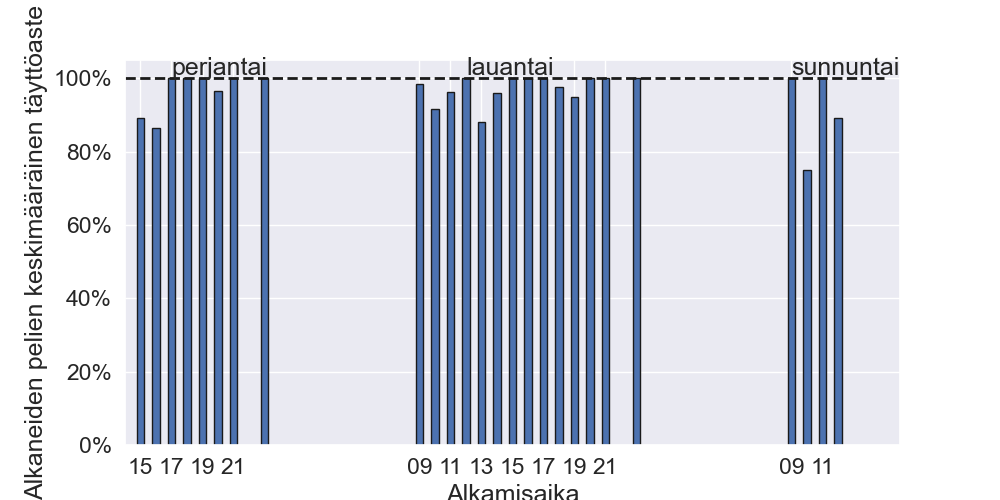

In [169]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(players_in_game_data_by_datetime.index, players_in_game_data_by_datetime.fillPercent*100, width=0.02, edgecolor='k', linewidth=1)

ax.plot((datetime(2022,7,29,14), datetime(2022,7,31,15)), (100, 100), color='k', linestyle='--', linewidth=2)
ax.set_ylabel('Alkaneiden pelien keskimääräinen täyttöaste')
ax.set_xlabel('Alkamisaika')
ax.set_xticks(players_in_game_data_by_datetime.index.to_list()[::2])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_ylim([0, 105])
ax.set_xlim([datetime(2022,7,29,14,0,0), datetime(2022,7,31,16)])
ax.set_yticks(np.linspace(0,100,6))
ax.set_yticklabels([f'{int(n)}%' for n in ax.get_yticks()])
ax.text(datetime(2022,7,29,17,00), 101, 'perjantai')
ax.text(datetime(2022,7,30,12,00), 101, 'lauantai')
ax.text(datetime(2022,7,31,9,00), 101, 'sunnuntai')